<a href="https://colab.research.google.com/github/NosenkoArtem/Categorical-Encoding/blob/master/%D0%94%D0%97_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Первое домашне задание будет состоять из двух частей.

**Часть 1.**

- Обучить модель, ктоторая предсказывает параметры для смеси гауссиан.


**Часть 2.**

$$ \mathcal{N} = \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} $$

- Вывести и выписать значение энтропии для нормального распределения $H[P]= -\sum_{x\in\mathcal{X}}p(x) \log p(x)$

- Выписать KL дивергенцию между двумя нормальныи распределениями.

$ KL = \sum_{i=1}^{N} p(x_i) \cdot \log \frac{ p(x_i)}{q(x_i)} $, где $p$ и $q$ нормальные распределения с разными средними и дисперсиями.


### Как сдать задания


**Для части один** напишите код, запустите его и нарисуйте графики, которые демонстрируют что если семплировать из параметров, полученных после обучения мы получим распределение похожее на оригинальное.

**Для части два** вставьте в ноутбук избражение с решением или введите его в латех в ноутбуке.


__Часть 2__

__Задание 1:__


- Вывести и выписать значение энтропии для нормального распределения $H[P]= -\sum_{x\in\mathcal{X}}p(x) \log p(x)$

Так как:
 $$ p(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} $$


 $$ \log p(x) = \log\Big(\frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\}\Big) = \log\Big(\frac{1}{\sigma\sqrt{2\pi}}\Big) - \frac{(x - \mu)^2}{2\sigma^2} = \frac{1}{2} \log\Big(\frac{1}{2\pi\sigma^2}\Big) - \frac{(x - \mu)^2}{2\sigma^2} $$

 Итого:

 $H[P] = -\sum_{x\in\mathcal{X}}p(x) \log p(x) = -\sum_{x\in\mathcal{X}} \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} \Big(\frac{1}{2} \log\Big(\frac{1}{2\pi\sigma^2}\Big) - \frac{(x - \mu)^2}{2\sigma^2}\Big)$


Распишем в два слагаемых:


$H[P] = -\frac{1}{2}\log\Big(\frac{1}{2\pi\sigma^2}\Big)\sum_{x\in\mathcal{X}} \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} +
\sum_{x\in\mathcal{X}}  \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\}\frac{(x - \mu)^2}{2\sigma^2}$

__Первое слагаемое:__

$
-\frac{1}{2}\log\Big(\frac{1}{2\pi\sigma^2}\Big)\sum_{x\in\mathcal{X}} \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} = -\frac{1}{2}\log\Big(\frac{1}{2\pi\sigma^2}\Big) = \frac{1}{2}\log\Big(2\pi\sigma^2\Big)
$

т.к. $\sum_{x\in\mathcal{X}} \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\} = 1$


__Второе слагаемое:__

$
\sum_{x\in\mathcal{X}}  \frac{1}{\sigma\sqrt{2\pi}}\exp\left\{-\frac{(x - \mu)^2}{2\sigma^2}\right\}\frac{(x - \mu)^2}{2\sigma^2} = \frac{1}{2}
$

__Итог__:

$H[P] = \frac{1}{2}\log(2\pi\sigma^2) + \frac{1}{2} =  \frac{1}{2}\log(2\pi\sigma^2e)$

__Часть 2__

__Задание 2:__

- Выписать KL дивергенцию между двумя нормальныи распределениями.

In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import pandas as pd

In [ ]:

def gen_data(mu_1=0, sigma_1=1, mu_2=0, sigma_2=1, proportion=0.3, n=1000):
    data = np.zeros(n)
    for i in range(n):
        if np.random.rand() < proportion:
            data[i] = np.random.normal(loc=mu_1, scale=sigma_1)
        else:
            data[i] = np.random.normal(loc=mu_2, scale=sigma_2)
    return data

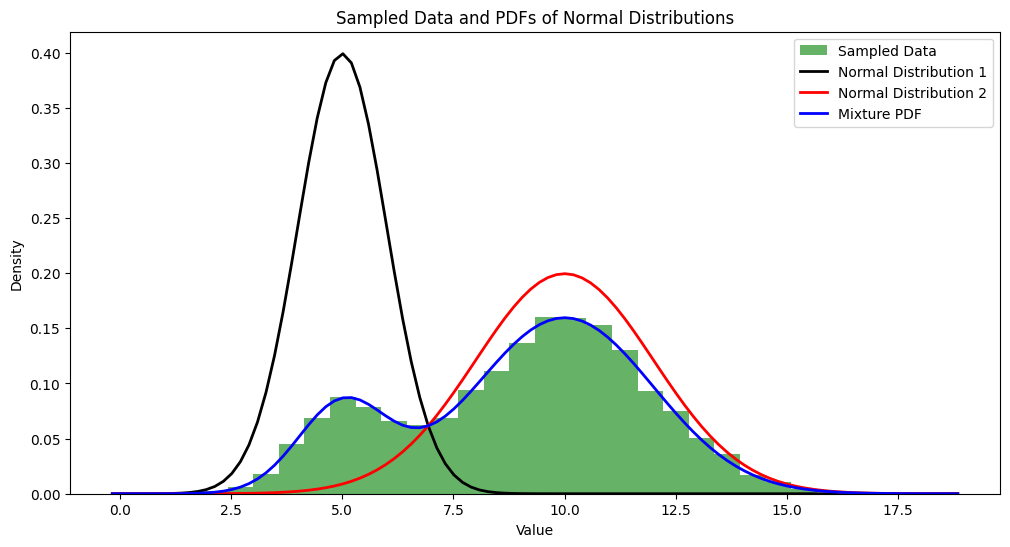

In [ ]:
#Parameters for the normal distributions
mu_1 = 5
sigma_1 = 1
mu_2 = 10
sigma_2 = 2
proportion = 0.2
n = 10000

# Generate data
data = gen_data(mu_1, sigma_1, mu_2, sigma_2, proportion, n)

# Plot the sampled data
plt.figure(figsize=(12, 6))

# Histogram of the sampled data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Sampled Data')

# Plot the PDFs of the two normal distributions
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, mu_1, sigma_1)
p2 = stats.norm.pdf(x, mu_2, sigma_2)
plt.plot(x, p1, 'k', linewidth=2, label='Normal Distribution 1')
plt.plot(x, p2, 'r', linewidth=2, label='Normal Distribution 2')

# Plot the mixture PDF
mixture_pdf = proportion * p1 + (1 - proportion) * p2
plt.plot(x, mixture_pdf, 'b', linewidth=2, label='Mixture PDF')

# Add labels and legend
plt.title('Sampled Data and PDFs of Normal Distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MixtureModel(nn.Module):
    def __init__(self):
        super(MixtureModel, self).__init__()
        self.mu_1 = nn.Parameter(torch.tensor(0.0))
        self.sigma_1 = nn.Parameter(torch.tensor(1.0))
        self.mu_2 = nn.Parameter(torch.tensor(0.0))
        self.sigma_2 = nn.Parameter(torch.tensor(1.0))
        self.proportion = nn.Parameter(torch.tensor(0.1))

    def forward(self, x):

        # TODO

        p1 = torch.exp(-(x - self.mu_1)**2 / (2 * self.sigma_1**2)) / (self.sigma_1 * torch.sqrt(2 * torch.tensor(np.pi)))
        p2 = torch.exp(-(x - self.mu_2)**2 / (2 * self.sigma_2**2)) / (self.sigma_2 * torch.sqrt(2 * torch.tensor(np.pi)))
        mixture_pdf = torch.abs(self.proportion) * p1 + torch.abs(1 - self.proportion) * p2
        return mixture_pdf

# Convert data to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
model = MixtureModel()

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1
batch_size = 1000
for epoch in range(num_epochs):
    # Forward pass
    indices = torch.randperm(data_tensor.size(0))[:batch_size]
    outputs = model(data_tensor[indices])


    # Backward pass and optimization
    optimizer.zero_grad()



    outputs.mean().backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Print the estimated parameters
print(f'Estimated mu_1: {model.mu_1.item():.4f}')
print(f'Estimated sigma_1: {model.sigma_1.item():.4f}')
print(f'Estimated mu_2: {model.mu_2.item():.4f}')
print(f'Estimated sigma_2: {model.sigma_2.item():.4f}')
print(f'Estimated proportion: {model.proportion.item():.4f}')

Estimated mu_1: -0.0010
Estimated sigma_1: 0.9990
Estimated mu_2: -0.0010
Estimated sigma_2: 0.9990
Estimated proportion: 0.1000


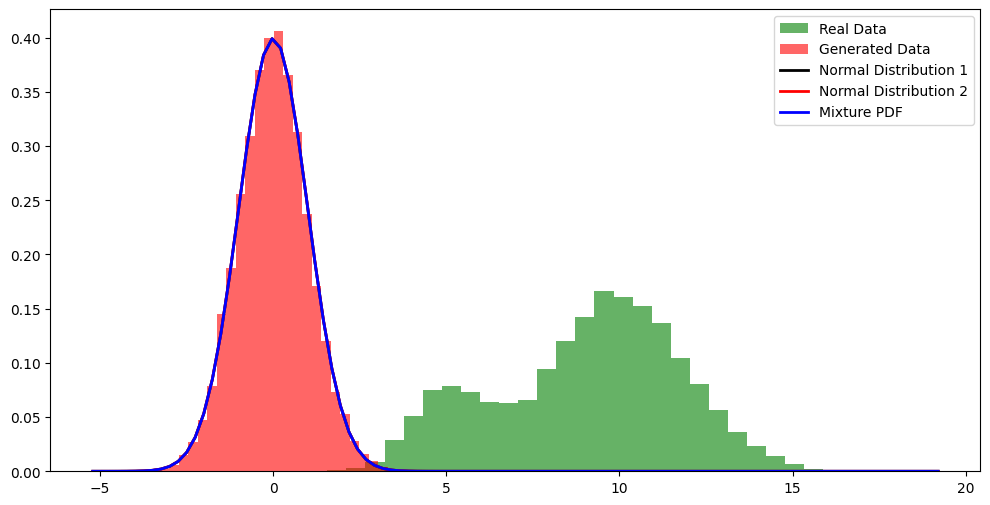

In [ ]:
# Generate data
data_gen = gen_data(model.mu_1.item(), model.sigma_1.item(), model.mu_2.item(), model.sigma_2.item(), model.proportion.item(), n)

data = gen_data(mu_1, sigma_1, mu_2, sigma_2, proportion, n)

# Plot the sampled data
plt.figure(figsize=(12, 6))

# Histogram of the sampled data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Real Data')

plt.hist(data_gen, bins=30, density=True, alpha=0.6, color='r', label='Generated Data')

# Plot the PDFs of the two normal distributions
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p1 = stats.norm.pdf(x, model.mu_1.item(), model.sigma_1.item())
p2 = stats.norm.pdf(x, model.mu_2.item(), model.sigma_1.item())
plt.plot(x, p1, 'k', linewidth=2, label='Normal Distribution 1')
plt.plot(x, p2, 'r', linewidth=2, label='Normal Distribution 2')

# Plot the mixture PDF
mixture_pdf = proportion * p1 + (1 - proportion) * p2
plt.plot(x, mixture_pdf, 'b', linewidth=2, label='Mixture PDF')
plt.legend()

### Ваша задача с помощью модели найти параметры распределения максмиально близкие к оригинальным.